<h1>Data Preprocessing

<h1>Importing Libraries

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [153]:
df=pd.read_csv(r"C:\Users\ASUS\Desktop\train.csv")


In [154]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [155]:
df.shape

(891, 12)

<h1>Checking for Missing Values

In [156]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<h1>Drop Missing Values

In [157]:
df1=df.dropna()
df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [158]:
df1.shape

(183, 12)

<h6>After dropping missing values,we can see the decreased size of our dataset

<h1>Filling Missing Values

In [159]:
df['Age']=df['Age'].replace(np.NaN,df['Age'].mean())
df['Age'][:10]

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: Age, dtype: float64

In [160]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [161]:
df=df.drop('Cabin',axis=1)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

<h6>We filled the missing values with the mean.Now we can see that previously data at index 5 was missing for Age feature but now it is filled with mean value.

<h1>Predicting Missing Values

In [162]:
data = [[23,30,123],[43,56,190],[32,67,200],[39,58],[40,67,230],[31,78,167],[33,89],[41,289],[21,56,140],[81,160,340]]
df2 = pd.DataFrame(data=data,columns=['X','Y','Z'])


In [163]:
df2.shape

(10, 3)

In [164]:
df2.isnull().sum()

X    0
Y    0
Z    3
dtype: int64

In [165]:
from sklearn.linear_model import LinearRegression

In [166]:
test_data = df2[df2["Z"].isnull()]
X_test = test_data.drop("Z", axis=1)

In [167]:
df2.dropna(inplace=True)
y_train = df2["Z"]
X_train = df2.drop("Z", axis=1)

print(X_train)

    X    Y
0  23   30
1  43   56
2  32   67
4  40   67
5  31   78
8  21   56
9  81  160


In [168]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [169]:
y_pred

array([192.49561197, 190.61840485, 299.76049853])

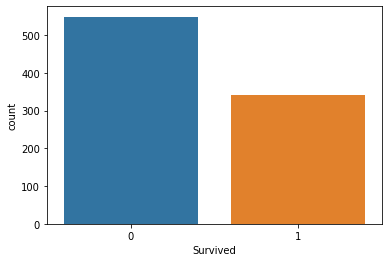

In [170]:
sns.countplot(x='Survived', data=df);
plt.show()

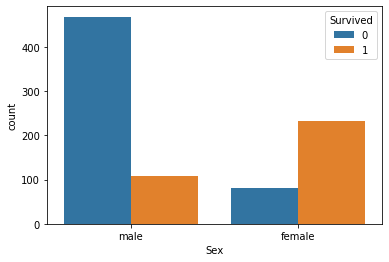

In [171]:

sns.countplot(x='Sex',hue='Survived',data=df)



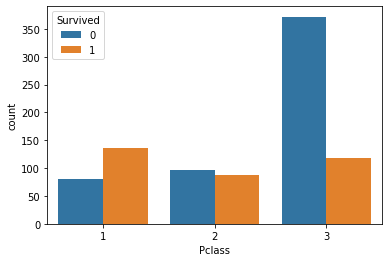

In [172]:

sns.countplot(x='Pclass',hue='Survived',data=df)


In [173]:

df.Survived = df.Survived.astype('int64')

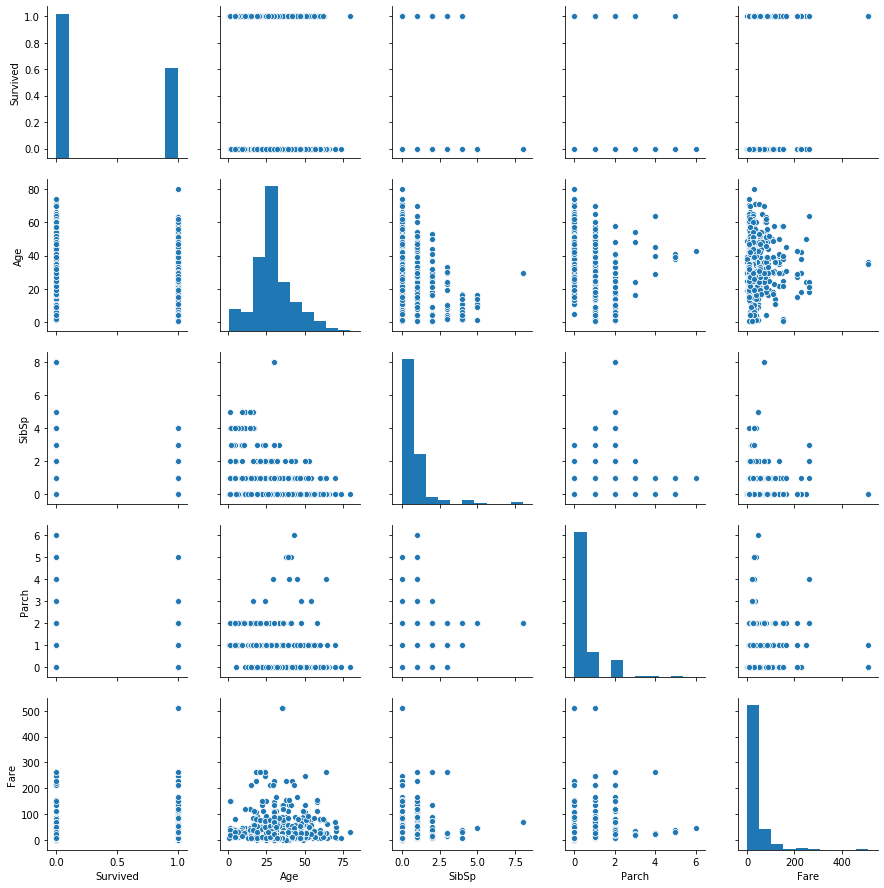

In [174]:
sns.pairplot(df[['Survived','Age','SibSp','Parch','Fare']])

<h1>Dealing with Categorical Values
<h3>One-hot Encoding

In [175]:
dummy=pd.get_dummies(df['Sex'])

In [176]:
dummy

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [177]:
df=pd.concat([df,dummy],axis=1)

In [178]:
df=df.drop('Sex',axis=1)

In [179]:
dummy=pd.get_dummies(df['Embarked'],drop_first=True)

In [180]:
dummy

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [181]:
df=pd.concat([df,dummy],axis=1)

In [182]:
df=df.drop('Embarked',axis=1)

In [183]:
df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,female,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,0,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,1,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,1,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,0,1,0,0


In [184]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
female         0
male           0
Q              0
S              0
dtype: int64

In [185]:
df=df.drop(['PassengerId','Name','Ticket'],axis=1)

In [186]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,Q,S
0,0,3,22.000000,1,0,7.2500,0,1,0,1
1,1,1,38.000000,1,0,71.2833,1,0,0,0
2,1,3,26.000000,0,0,7.9250,1,0,0,1
3,1,1,35.000000,1,0,53.1000,1,0,0,1
4,0,3,35.000000,0,0,8.0500,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,0,1,0,1
887,1,1,19.000000,0,0,30.0000,1,0,0,1
888,0,3,29.699118,1,2,23.4500,1,0,0,1
889,1,1,26.000000,0,0,30.0000,0,1,0,0
